In [3]:
import numpy as np
import pandas as pd

In [4]:
adv=pd.read_csv('advertising.csv')

In [5]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
adv.shape

(200, 4)

In [4]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

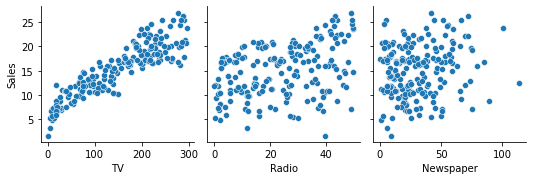

In [8]:
sns.pairplot(adv, x_vars = ['TV','Radio','Newspaper'], y_vars = 'Sales',kind = 'scatter')
plt.show()

In [9]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


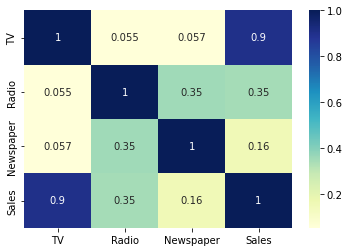

In [10]:
sns.heatmap(adv.corr(),cmap = 'YlGnBu',annot = True)
plt.show()

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [4]:
sklearn?

Type:        module
String form: <module 'sklearn' from 'C:\\Users\\dukav\\anaconda3\\lib\\site-packages\\sklearn\\__init__.py'>
File:        c:\users\dukav\anaconda3\lib\site-packages\sklearn\__init__.py
Docstring:  
Machine learning module for Python

sklearn is a Python module integrating classical machine
learning algorithms in the tightly-knit world of scientific Python
packages (numpy, scipy, matplotlib).

It aims to provide simple and efficient solutions to learning problems
that are accessible to everybody and reusable in various contexts:
machine-learning as a versatile tool for science and engineering.

See http://scikit-learn.org for complete documentation.


### Steps to build linear regression model

1. Create X and y
2. Split the dataset into train and test Data
3. learn the coefficients, (intercept and slope) called the model parameters


### steps in sklearn model building
1. create an object of linear regression or other methods
2. fit the model
3. see the params, make predictions(train,test)
4. evaluate model (r2_score etc)

In [12]:
X = adv['TV']
y= adv.Sales


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75)

In [28]:
R = np.corrcoef(X_train,y_train)

In [30]:
R2 = R[0,1]**2

0.8179882742780442

In [65]:
##create an object of linear regression or other methods
lin_model = LinearRegression()

##see the params, make predictions(train,test)
##evaluate model (r2_score etc)

In [66]:
##fit the model
lin_model.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[206.9 140.3  17.2  76.4  87.2 184.9 164.5  23.8 204.1 142.9  18.8 237.4
  48.3  25.1 198.9 209.6 213.5  11.7 280.2 163.5 175.1 191.1  28.6 222.4
 202.5 280.7 149.8 175.7 217.7 255.4  62.3 131.1  57.5 293.6 273.7 276.9
 151.5 180.8 229.5 210.7   8.7 216.8 139.5 149.7 283.6  75.3  13.1 266.9
 239.9 214.7 109.8 116.  121.  193.7 199.1   5.4  75.1  13.2 112.9 262.9
 218.4   0.7  43.1 240.1 239.8  93.9 177.    8.4 110.7  39.5  70.6 107.4
 182.6 139.3 215.4  27.5 225.8 131.7   8.6 218.5 281.4  69.2 261.3 220.3
  76.3 102.7 188.4 147.3 290.7 104.6 136.2 292.9 222.4  85.7 248.8  78.2
 219.8 135.2  68.4 125.7 237.4 287.6 228.3 197.6  90.4  43.  197.6 177.
 100.4  89.7  44.5   7.3  97.2 199.8 199.8  36.9 163.3 141.3 120.2 230.1
 243.2 220.5 265.6  50.   88.3 265.2  38.  232.1  76.4 187.9 276.7  19.6
 165.6 193.2   4.1 240.1  94.2  66.9 262.7  74.7 170.2 239.3 129.4 241.7
  16.9 134.3  25.  227.2 205.   95.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [67]:
X_train_lm = X_train.values.reshape(-1,1)
y_train_lm = y_train.values.reshape(-1,1)

In [73]:
X_test_lm = X_test.values.reshape(-1,1)
y_test_lm = y_test.values.reshape(-1,1)

In [ ]:
##fit the model
lin_model.fit(X_train_lm,y_train_lm)

LinearRegression()

In [70]:
lin_model.intercept_

array([6.75626916])

In [71]:
lin_model.coef_

array([[0.05603677]])

In [74]:
## Make predictions
y_train_pred = lin_model.predict(X_train_lm)
y_test_pred = lin_model.predict(X_test_lm)

In [75]:
print(r2_score(y_true = y_train, y_pred = y_train_pred))

print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8056435730188143
0.8294986356948731
